In [14]:
# Predict the price of the Uber ride from a given pickup point to the agreed drop-off location.
# Perform following tasks:
# 1. Pre-process the dataset.
# 2. Identify outliers.
# 3. Check the correlation.
# 4. Implement linear regression and random forest regression models.
# 5. Evaluate the models and compare their respective scores like R2, RMSE, etc.
# Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv("uber.csv")
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


Preprocessing

In [16]:
# Removing nulll values
df = df.dropna()

# Null values
display(df.isna().sum())

# Removing invalid latitudes and longitudes
outliers = df[
    (df['pickup_latitude'] < -90) | (df['pickup_latitude'] > 90) |
    (df['pickup_longitude'] < -180) | (df['pickup_longitude'] > 180) |
    (df['dropoff_latitude'] < -90) | (df['dropoff_latitude'] > 90) |
    (df['dropoff_longitude'] < -180) | (df['dropoff_longitude'] > 180)
]
print("\n\nOutliers")
display(outliers)
display(df.shape)


df = df[(df['pickup_latitude'] >= -90) & (df['pickup_latitude'] <= 90)]
df = df[(df['pickup_longitude'] >= -180) & (df['pickup_longitude'] <= 180)]
df = df[(df['dropoff_latitude'] >= -90) & (df['dropoff_latitude'] <= 90)]
df = df[(df['dropoff_longitude'] >= -180) & (df['dropoff_longitude'] <= 180)]

# Checking for invalid values
outliers = df[
    (df['pickup_latitude'] < -90) | (df['pickup_latitude'] > 90) |
    (df['pickup_longitude'] < -180) | (df['pickup_longitude'] > 180) |
    (df['dropoff_latitude'] < -90) | (df['dropoff_latitude'] > 90) |
    (df['dropoff_longitude'] < -180) | (df['dropoff_longitude'] > 180)
]
display(outliers)
display(df.shape)

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64



Outliers


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
4949,42931506,2012-04-28 00:58:00.000000235,4.9,2012-04-28 00:58:00 UTC,-748.016667,40.739957,-74.003570,40.734192,1
32549,5634081,2012-06-16 10:04:00.00000061,15.7,2012-06-16 10:04:00 UTC,-74.016055,40.715155,-737.916665,40.697862,2
48506,1055960,2011-11-05 23:26:00.000000309,33.7,2011-11-05 23:26:00 UTC,-735.200000,40.770092,-73.980187,40.765530,1
56617,14257861,2012-03-11 07:24:00.00000031,8.1,2012-03-11 07:24:00 UTC,-73.960828,404.433332,-73.988357,40.769037,1
61793,2849369,2012-06-13 05:45:00.0000006,8.5,2012-06-13 05:45:00 UTC,-73.951385,401.066667,-73.982110,40.754117,1
75851,33249845,2011-11-05 00:22:00.00000051,15.7,2011-11-05 00:22:00 UTC,-1340.648410,1644.421482,-3356.666300,872.697628,1
91422,23566642,2011-05-18 13:24:00.000000213,16.1,2011-05-18 13:24:00 UTC,57.418457,1292.016128,1153.572603,-881.985513,1
103745,16826862,2011-10-14 19:04:00.000000202,12.9,2011-10-14 19:04:00 UTC,-736.216667,40.767035,-73.982377,40.725562,1
139447,39981694,2012-01-20 11:50:00.00000088,13.7,2012-01-20 11:50:00 UTC,-74.011042,40.709780,-73.983163,493.533332,4
144253,9421322,2009-08-26 11:55:00.00000023,7.3,2009-08-26 11:55:00 UTC,-768.550000,40.757812,-73.997040,40.740007,1


(199999, 9)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


(199987, 9)

In [17]:
# Adding distance column
# x1, x2 - pickup and dropoff latitudes
# y1, y2 - pickup and drop of longitudes
x1 = df['pickup_latitude'] * np.pi/180
x2 = df['dropoff_latitude'] * np.pi/180
y1 = df['pickup_longitude'] * np.pi/180
y2 = df['dropoff_longitude'] * np.pi/180
dist_lat = x2-x1
dist_long = y2-y1
r = 6371.0

a = np.sin(dist_lat/2)**2 + np.cos(x1) * np.cos(x2) * np.sin(dist_long/2)**2
ans = 2 * r * np.arctan2(np.sqrt(a), np.sqrt(1-a))

df['distance'] = ans
df = df[(df['distance'] > 0) & (df['fare_amount'] > 0)]
df




,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.475450
...,...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1,0.112210
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,1.875050
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2,12.850319
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1,3.539715


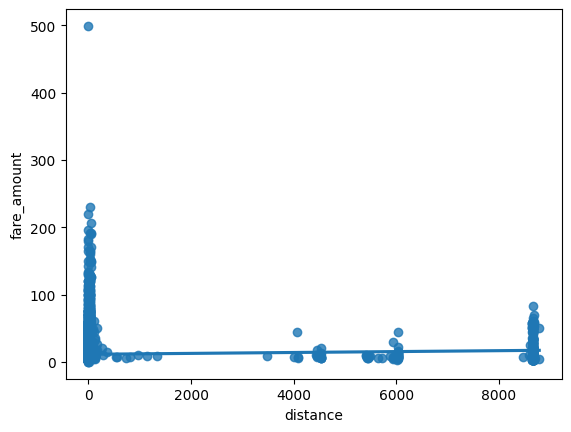

In [18]:
sns.regplot(x='distance', y='fare_amount', data=df)
plt.xlabel("distance")
plt.ylabel("fare_amount")
plt.show()

In [22]:
# We get many outliers, thus we remove thm again

# Removing outliers again
df.drop(df[df['distance'] >= 60].index, inplace=True)
df.drop(df[df['fare_amount'] <= 0].index, inplace=True)
df.drop(df[(df['fare_amount']>100) & (df['distance']<1)].index, inplace=True)

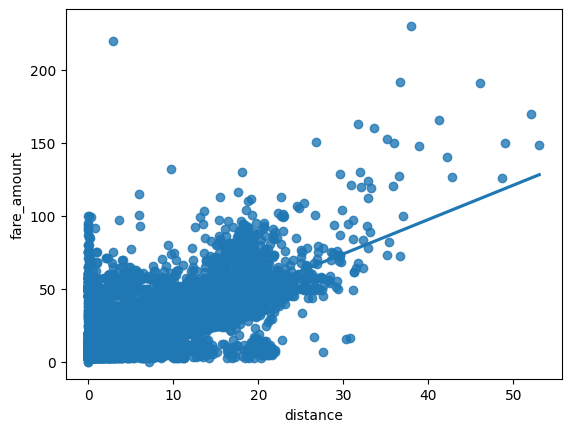

In [23]:
sns.regplot(x='distance', y='fare_amount', data=df)
plt.xlabel("distance")
plt.ylabel("fare_amount")
plt.show()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
Unnamed: 0,1.000000,0.000079,-0.000424,0.000230,-0.000371,0.000219,0.002795,-0.000462
fare_amount,0.000079,1.000000,0.011970,-0.008808,0.010464,-0.008621,0.012948,0.885141
pickup_longitude,-0.000424,0.011970,1.000000,-0.994006,0.999883,-0.993974,0.009175,0.005357
pickup_latitude,0.000230,-0.008808,-0.994006,1.000000,-0.993994,0.999928,-0.009306,-0.002835
dropoff_longitude,-0.000371,0.010464,0.999883,-0.993994,1.000000,-0.993961,0.009169,0.004427
dropoff_latitude,0.000219,-0.008621,-0.993974,0.999928,-0.993961,1.000000,-0.009266,-0.002152
passenger_count,0.002795,0.012948,0.009175,-0.009306,0.009169,-0.009266,1.000000,0.007770
distance,-0.000462,0.885141,0.005357,-0.002835,0.004427,-0.002152,0.007770,1.000000


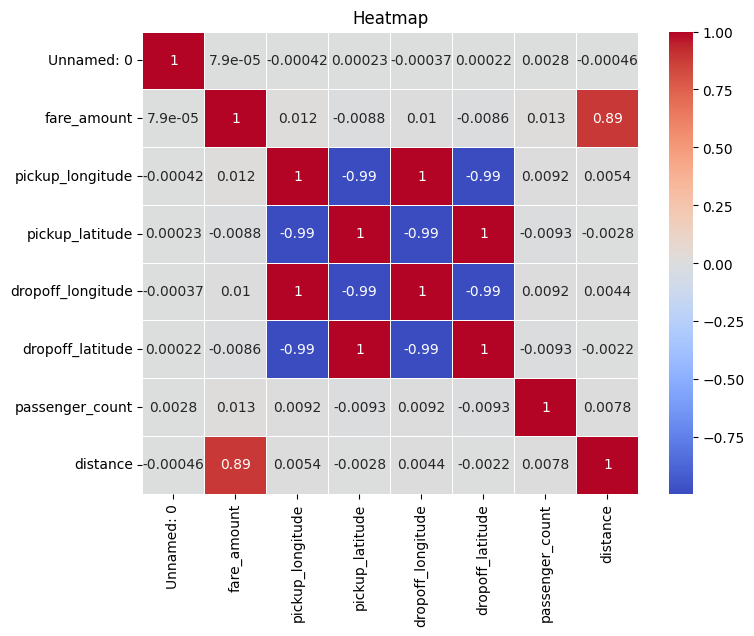

In [24]:
num_df = df.select_dtypes(include=['number'])

corr = num_df.corr()
display(corr)

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidth=0.5)
plt.title("Heatmap")
plt.show()

In [26]:
# Regressions
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error


X = df[['distance']]
y = df['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)

# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Results:")
    print("R² Score:", r2_score(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("Root mean squared error:", root_mean_squared_error(y_true, y_pred))

evaluate_model("Linear Regression", y_test, y_pred_lin)
evaluate_model("Random Forest", y_test, y_pred_rf)


Linear Regression Results:
R² Score: 0.7882902147332442
MSE: 19.791247913259397
MAE: 2.34718836352532
Root mean squared error: 4.4487355409441225

Random Forest Results:
R² Score: 0.7052614776346295
MSE: 27.553016306595687
MAE: 2.8661144047404084
Root mean squared error: 5.249096713397048


# ...Explaination ...
Here is an explanation of the Python code provided in the Jupyter Notebook Exp1.ipynb, which aims to predict the price of an Uber ride.

The notebook follows a standard machine learning workflow, including Data Preprocessing, Exploratory Data Analysis (EDA), Feature Engineering, Model Implementation, and Evaluation.

💻 Code Explanation
1. Setup and Data Loading (Cells 5, 8)
Imports: Essential libraries for data manipulation, visualization, and machine learning are imported:

pandas (pd): For data manipulation (DataFrames).

numpy (np): For numerical operations, particularly in distance calculation.

matplotlib.pyplot (plt) and seaborn (sns): For data visualization.

Various modules from sklearn (later cells): For model building and evaluation.

Data Loading: The dataset from the file "uber.csv" is loaded into a pandas DataFrame named df.

Initial Display: df is displayed to show the first and last few rows and confirm the columns and total number of entries (200,000 rows, 9 columns).

2. Preprocessing and Initial Outlier Removal (Cell 9)
This section performs initial cleaning steps.

Handling Missing Values:

Python
df = df.dropna()
display(df.isna().sum())
This drops any rows containing null (missing) values across any column and then verifies that no nulls remain.

Outlier Removal - Geographic Coordinates:

Python
outliers = df[
    (df['pickup_latitude'] < -90) | (df['pickup_latitude'] > 90) |
    # ... (other longitude/latitude checks) ...
]
# ... filtering code ...
The latitude and longitude values must fall within the physical limits of the Earth's coordinate system: Latitude must be between −90 
∘
  and 90 
∘
 , and Longitude between −180 
∘
  and 180 
∘
 . The code identifies and removes rows where the coordinate data is physically impossible, which are clear data entry errors (outliers). The DataFrame shape is displayed before and after this removal to show the count of filtered rows.

🛠 Feature Engineering and Further Outlier Removal
3. Calculating Ride Distance (Haversine Formula) (Cell 10)
Since latitude and longitude are poor direct predictors, the physical distance between the pickup and dropoff points is calculated using the Haversine formula, which computes the great-circle distance between two points on a sphere (approximating the Earth).

Formula Steps:

Convert latitude and longitude columns from degrees to radians using x∗π/180.

Define the Earth's radius, r=6371.0 (in kilometers).

Calculate the components of the Haversine formula:
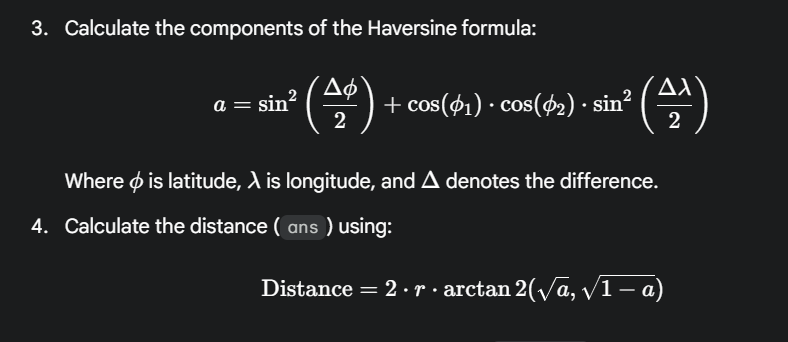
a=sin 
2( 
2
Δϕ
​
 )+cos(ϕ 
1
​
 )⋅cos(ϕ 
2
​
 )⋅sin 
2
 ( 
2
Δλ
​
 )
Where ϕ is latitude, λ is longitude, and Δ denotes the difference.

Calculate the distance (ans) using:

Distance=2⋅r⋅arctan2( 
a

​
 , 
1−a

​
 )
New Feature: The result is stored in a new column, distance.

Filtering: Rows where distance ≤0 (e.g., pickup and dropoff are the same point, or fare is non-positive) are removed, as these are typically not valid rides.

4. Correlation Check and Visual Outlier Removal (Cells 11, 12, 13)
Initial Visualization (Cell 11): A regplot is used to plot fare_amount against the newly calculated distance. This visual check helps identify obvious outliers where the fare-to-distance relationship breaks down (e.g., extremely long distances for low fares, or very high fares for minimal distance).

Further Outlier Removal (Cell 12): Based on the visualization, more domain-specific outliers are removed:

Rides with a distance greater than or equal to 60 km are removed (assuming most valid New York City rides are shorter).

Rides where fare_amount is ≤0 are explicitly dropped again.

Rides with fare_amount >100 USD but a distance <1 km are removed, as this likely represents fraudulent or erroneous high-fare, short-distance trips.

Re-Visualization (Cell 13): A second regplot is shown to confirm that the bulk of the outliers have been removed, resulting in a cleaner linear trend between distance and fare.

5. Correlation Analysis (Cell 14)
Select Numeric Columns: df.select_dtypes(include=['number']) selects the relevant numeric features for correlation.

Calculate Correlation: The Pearson correlation coefficient is calculated for all pairs of numeric columns.

Heatmap Visualization: A heatmap is generated to visually represent the correlation matrix. This is critical for understanding which features (like distance) are strongly related to the target variable (fare_amount). The output shows a positive correlation between distance and fare_amount.

🧠 Model Implementation and Evaluation
6. Model Setup (Cell 15)
Imports: Necessary machine learning tools are imported:

train_test_split: To divide the data into training and testing sets.

LinearRegression: The simple linear model.

RandomForestRegressor: A powerful ensemble tree model.

mean_squared_error, r2_score, etc.: Metrics for evaluation.

Feature and Target Definition:

X (Feature): df[['distance']] (The model uses only the distance feature).

y (Target): df['fare_amount'] (The value to be predicted).

Data Splitting: The data is split, typically 80% for training (X_train, y_train) and 20% for testing (X_test, y_test), with a random_state set for reproducibility.

7. Model Training
Linear Regression:

Python
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)
A linear model is trained on the training data and then used to make predictions on the test data.

Random Forest Regression:

Python
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
A Random Forest model (an ensemble of 100 decision trees) is trained, which can capture more complex, non-linear relationships than linear regression.

8. Model Evaluation
evaluate_model Function: A reusable function is defined to print standard regression evaluation metrics for a given model's predictions.

Evaluation Metrics:

R² Score (Coefficient of Determination): Represents the proportion of the variance in the dependent variable that is predictable from the independent variable(s). Closer to 1.0 is better.

MSE (Mean Squared Error): The average squared difference between the predicted and actual values. Lower is better.

MAE (Mean Absolute Error): The average absolute difference between the predicted and actual values. Less sensitive to outliers than MSE. Lower is better.

RMSE (Root Mean Squared Error): The square root of the MSE. It's in the same units as the target variable, making it easier to interpret. Lower is better.

The output from the evaluations allows for a direct comparison of the Linear Regression model's performance against the potentially more sophisticated Random Forest Regression model.